# Tools And Techniques In Data Science
## Course Code: DS-5023
## Lab: 7
## Instructor: Mr. Faisal Asad ur Rehman

# ---------------------------------- Today Topic ------------------------------

# " Simple and Multiple Linear Regression with Python "

## Contents

In this Lab, you will learn how to visualize and implement the linear regression algorithm from scratch in Python using multiple libraries such as Pandas, Numpy, Scikit-Learn, and Scipy. Additionally, we will measure the direction and strength of the linear relationship between two variables using the Pearson correlation coefficient as well as the predictive precision of the linear regression model using evaluation metrics such as the mean square error.

## What is Regression ?

Linear regression is an approach to model the relationship between a single dependent variable (target variable) and one (simple regression) or more (multiple regression) independent variables. The linear regression model assumes a linear relationship between the input and output variables. If this relationship is present, we can estimate the coefficients required by the model to make predictions on new data.

## Analysis of the dataset

The dataset selected contains the height and weight of 5000 males and 5000 females.

The first step is to import the dataset using Pandas. Pandas is a Python open source library for data science that allows us to work easily with structured data, such as csv files, SQL tables, or Excel spreadsheets. After importing csv file, we can print the first five rows of our dataset, the data types of each column as well as the number of null values.

In [34]:
import pandas as pd

# read the csv file
data = pd.read_csv('../data/dss.csv')
df = data.copy()
# print the first 5 rows of the data set
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [35]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is AE64-4545

 Directory of C:\Users\abc\PycharmProjects\tryout\notebooks

12/15/2020  07:23 PM    <DIR>          .
12/15/2020  07:23 PM    <DIR>          ..
12/15/2020  07:23 PM           600,673 Document from Haseeb.ipynb
12/14/2020  08:32 PM         1,226,832 Lab 6.ipynb
12/14/2020  08:47 PM           175,208 try.ipynb
               3 File(s)      2,002,713 bytes
               2 Dir(s)  50,300,432,384 bytes free


In [36]:
# shape of the dataframe
df.shape

(10000, 3)

In [37]:
# data type of each column
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [38]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [39]:
# number of unique values of column Gender
df.Gender.nunique()

2

In [40]:
# unique values of column Gender
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

As we can easily observe, the dataframe contains three columns: Gender, Height, and Weight. The Gender column contains two unique values of type object: male or female. A float data type is used in the columns Height and Weight. Since the dataframe does not contain null values and the data types are the expected ones, it is not necessary to clean the data .

To better understand the distribution of the variables Height and Weight, we can simply plot both variables using histograms. Histograms are plots that show the distribution of a numeric variable, grouping data into bins. The height of the bar represents the number of observations per bin.

In [41]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Text(0, 0.5, 'Frequency')

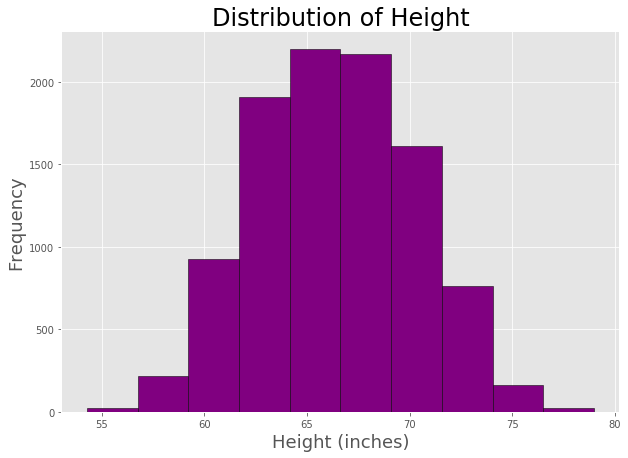

In [42]:
# histogram of the height
df.Height.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)

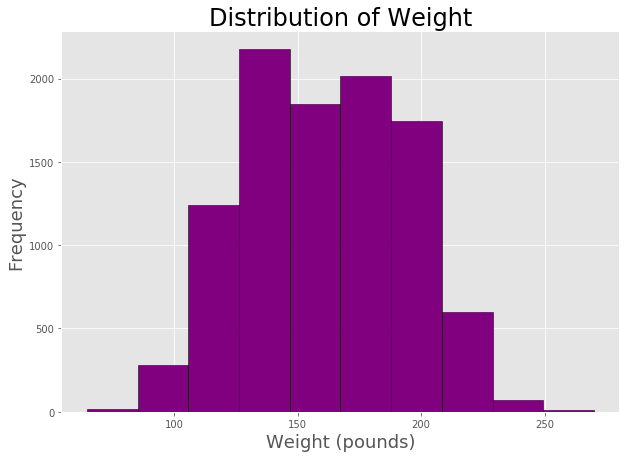

In [43]:
# histogram of the weight
df.Weight.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

The previous plots depict that both variables Height and Weight present a normal distribution. It can also be interesting as part of our exploratory analysis to plot the distribution of males and females in separated histograms.

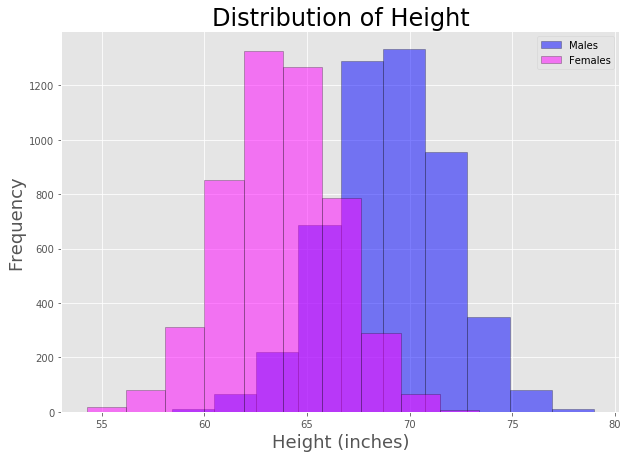

In [44]:
# histogram of the height - males and females

df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);

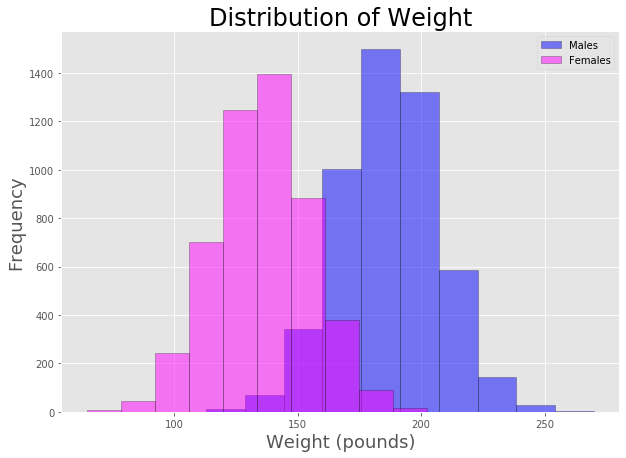

In [45]:
# histogram of the weight - males and females

df[df['Gender'] == 'Male'].Weight.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Weight.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

The previous plots show that both height and weight present a normal distribution for males and females. Although the average of both distribution is larger for males, the spread of the distributions is similar for both genders. Pandas provides a method called describe that generates descriptive statistics of a dataset (central tendency, dispersion and shape).

In [46]:
# Descriptive statistics male
statistics_male = df[df['Gender'] == 'Male'].describe()
statistics_male.rename(columns=lambda x: x + '_male', inplace=True)

# Descriptive statistics female
statistics_female = df[df['Gender'] == 'Female'].describe()
statistics_female.rename(columns=lambda x: x + '_female', inplace=True)

# Dataframe that contains statistics for both male and female
statistics = pd.concat([statistics_male, statistics_female], axis=1)
statistics

,Height_male,Weight_male,Height_female,Weight_female
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,69.026346,187.020621,63.708774,135.860093
std,2.863362,19.781155,2.696284,19.022468
min,58.406905,112.902939,54.263133,64.700127
25%,67.174679,173.887767,61.894441,122.934096
50%,69.027709,187.033546,63.730924,136.117583
75%,70.988744,200.357802,65.563565,148.810926
max,78.998742,269.989698,73.389586,202.237214


Exploratory data analysis consists of analyzing the main characteristics of a data set usually by means of visualization methods and summary statistics. The objective is to understand the data, discover patterns and anomalies, and check assumption before we perform further evaluations. After performing the exploratory analysis, we can conclude that height and weight are normal distributed. Males distributions present larger average values, but the spread of distributions compared to female distributions is really similar.

**But maybe at this point you ask yourself: There is a relation between height and weight? Can I use the height of a person to predict his weight?**

### **The answer of both question is YES! 😃 💪**

## Scatter plots with Matplotlib and linear regression with Numpy

A scatter plot is a two dimensional data visualization that shows the relationship between two numerical variables — one plotted along the x-axis and the other plotted along the y-axis. Matplotlib is a Python 2D plotting library that contains a built-in function to create scatter plots the matplotlib.pyplot.scatter() function.

The following plot shows the relation between height and weight for males and females. The visualization contains 10000 observations that is why we observe overplotting. Overplotting occurs when the data overlap in a visualization, making difficult to visualize individual data points. In this case, the cause is the large number of data points (5000 males and 5000 females). Another reason can be a small number of unique values; for instance, when one of the variables of the scatter plot is a discrete variable.

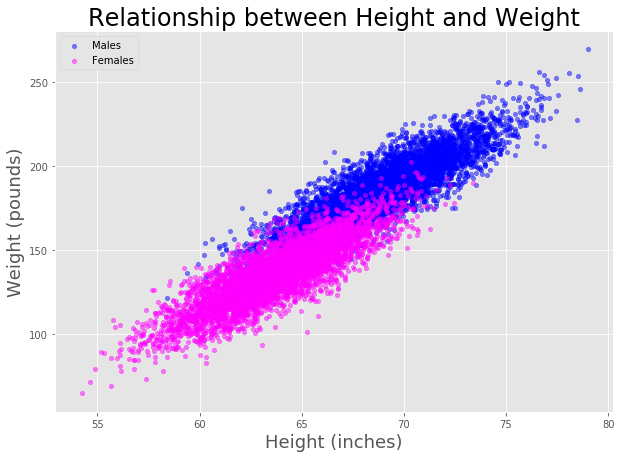

In [47]:
# Scatter plot of Height and Weight

ax1 = df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In the following plot, we have randomly selected the height and weight of 500 women. This plot has not overplotting and we can better distinguish individual data points. As we can observe in previous plots, weight of males and females tents to go up as height goes up, showing in both cases a linear relation.

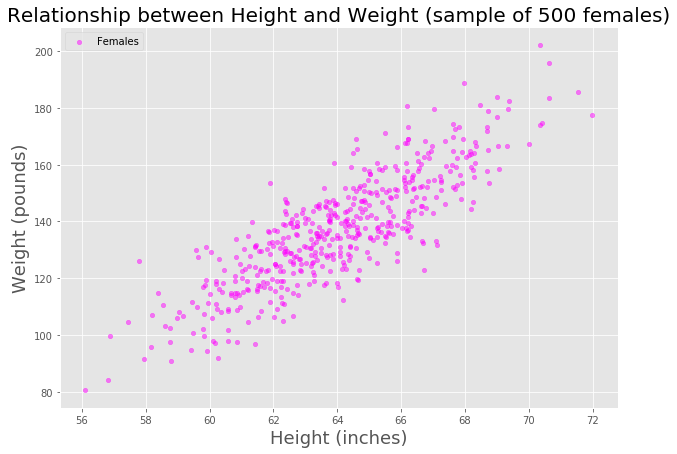

In [48]:
# Scatter plot of 500 females

sample_females = df[df['Gender'] == 'Female'].sample(500)
sample_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Females'])
plt.title('Relationship between Height and Weight (sample of 500 females)', size=20)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

Simple linear regression is a linear approach to modeling the relationship between a dependent variable and an independent variable, obtaining a line that best fits the data.

## y =a+bx

where x is the independent variable (height), y is the dependent variable (weight), b is the slope, and a is the intercept. The intercept represents the value of y when x is 0 and the slope indicates the steepness of the line. The objective is to obtain the line that best fits our data (the line that minimize the sum of square errors). The error is the difference between the real value y and the predicted value y_hat, which is the value obtained using the calculated linear equation.

## error = y(real)-y(predicted) = y(real)-(a+bx)

We can easily obtain this line using Numpy. Numpy is a python package for scientific computing that provides high-performance multidimensional arrays objects. The numpy function polyfit numpy.polyfit(x,y,deg) fits a polynomial of degree deg to points (x, y), returning the polynomial coefficients that minimize the square error. In the following lines of code, we obtain the polynomials to predict the weight for females and males.

In [49]:
import numpy as np

# best fit polynomials

df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# polynomial - males
male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)
# array([   5.96177381, -224.49884071])

# polynomial - females
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)
# array([   5.99404661, -246.01326575])

The following plot depicts the scatter plots as well as the previous regression lines

C:\Users\abc\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\abc\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\abc\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


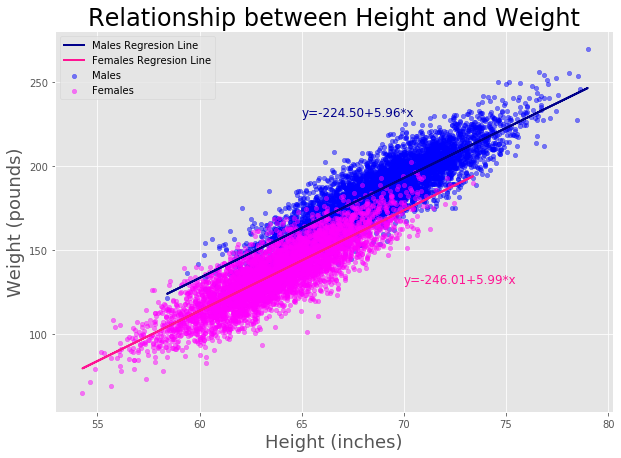

In [50]:
# scatter plots and regression lines
from sklearn.linear_model import LinearRegression

df_males = df[df['Gender'] == 'Male']

# create linear regression object
lr_males = LinearRegression()

# fit linear regression
lr_males.fit(df_males[['Height']], df_males['Weight'])
# lr_males.fit( df_males['Weight'],df_males[['Height']])

# get the slope and intercept of the line best fit
print(lr_males.intercept_)
# -224.49884070545772

print(lr_males.coef_)
# males and females dataframes
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# Scatter plots.
ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)

# regression lines
plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1], color='deeppink', linewidth=2)

# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)

# legend, title and labels.
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

## Scatter plots and linear regression line with seaborn

Seaborn is a Python data visualization library based on matplotlib. We can easily create regression plots with seaborn using the seaborn.regplot function. The number of lines needed is much lower in comparison to the previous approach.

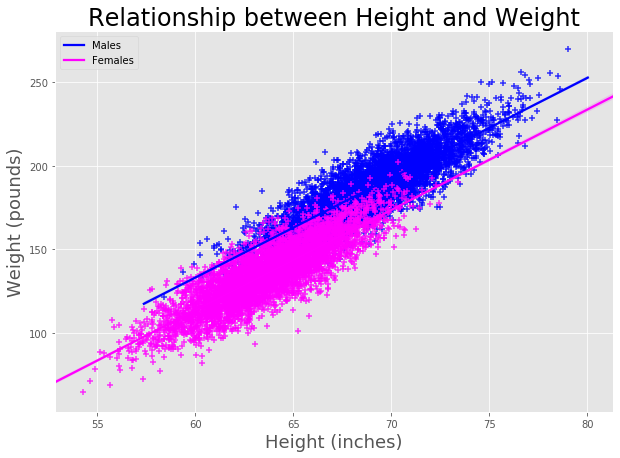

In [51]:
import seaborn as sns

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males.Height, y=df_males.Weight, color='blue', marker='+')
sns.regplot(x=df_females.Height, y=df_females.Weight, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

The previous plot presents overplotting as 10000 samples are plotted. The plot shows a positive linear relation between height and weight for males and females. For a better visualization, the following figure shows a regression plot of 300 randomly selected samples.

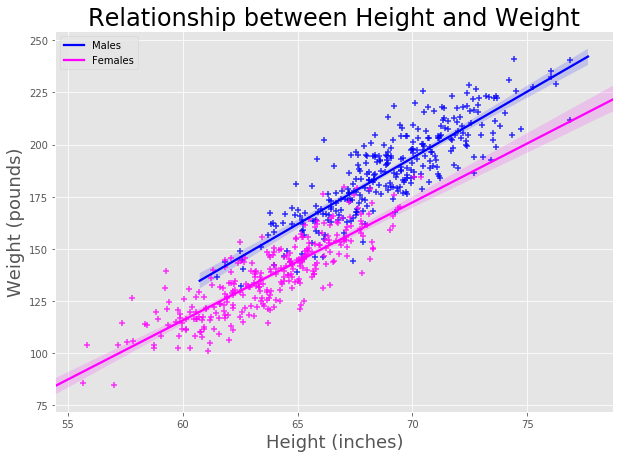

In [52]:
import seaborn as sns

# 300 random samples
df_males_sample = df[df['Gender'] == 'Male'].sample(300)
df_females_sample = df[df['Gender'] == 'Female'].sample(300)

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males_sample.Height, y=df_males_sample.Weight, color='blue', marker='+')
sns.regplot(x=df_females_sample.Height, y=df_females_sample.Weight, color='magenta', marker='+')

# legend, title, and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

## Fitting a simple linear model using sklearn

Scikit-learn is a free machine learning library for python. We can easily implement linear regression with Scikit-learn using the LinearRegression class. After creating a linear regression object, we can obtain the line that best fits our data by calling the fit method.

In [54]:
from sklearn.linear_model import LinearRegression

df_males = df[df['Gender'] == 'Male']

# create linear regression object
lr_males = LinearRegression()

# fit linear regression
lr_males.fit(df_males[['Height']], df_males['Weight'])
# lr_males.fit( df_males['Weight'],df_males[['Height']])

# get the slope and intercept of the line best fit
print(lr_males.intercept_)
# -224.49884070545772

print(lr_males.coef_)
# 5.96177381


df_females = df[df['Gender'] == 'Female']

# create linear regression object
lr_females = LinearRegression()

# fit linear regression
lr_females.fit(df_females[['Height']], df_females['Weight'])

# get the slope and intercept of the line best fit
print(lr_females.intercept_)
# -246.01326574667277

print(lr_females.coef_)
# 5.99404661

-224.49884070650657
[5.96177381]
-246.0132657396971
[5.99404661]


The values obtained using Sklearn linear regression match with those previously obtained using Numpy polyfit function as both methods calculate the line that minimize the square error. As previously mentioned, the error is the difference between the actual value of the dependent variable and the value predicted by the model. The least square error finds the optimal parameter values by minimizing the sum S of squared errors.

Once we have fitted the model, we can make predictions using the predict method. We can also make predictions with the polynomial calculated in Numpy by employing the polyval function. The predictions obtained using Scikit Learn and Numpy are the same as both methods use the same approach to calculate the fitting line.

In [ ]:
df_females = df[df['Gender'] == 'Female']

# fit the model using numpy
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)

# predictions using numpy
print(np.polyval(female_fit, [60]))
# [113.62953114]

# fit the model using scikit learn
lr_females = LinearRegression()
lr_females.fit(df_females[['Height']], df_females['Weight'])

# predictions using scikit learn
print(lr_females.predict([[60]]))
# [113.62953114]

## Pearson correlation coefficient

Correlation measures the extent to which two variables are related. The Pearson correlation coefficient is used to measure the strength and direction of the linear relationship between two variables. This coefficient is calculated by dividing the covariance of the variables by the product of their standard deviations and has a value between +1 and -1, where 1 is a perfect positive linear correlation, 0 is no linear correlation, and −1 is a perfect negative linear correlation.

We can obtain the correlation coefficients of the variables of a dataframe by using the .corr() method. By default, Pearson correlation coefficient is calculated; however, other correlation coefficients can be computed such as, Kendall or Spearman.


In [ ]:
# dataframe containing only females
df_females = df[df['Gender'] == 'Female']

# correlation coefficients 
df_females.corr()

In [ ]:
# dataframe containing only males
df_males = df[df['Gender'] == 'Male']

# correlation coefficients 
df_males.corr()

### A rule of thumb for interpreting the size of the correlation coefficient is the following:

* 1–0.8 → Very strong
* 0.799–0.6 → Strong
* 0.599–0.4 → Moderate
* 0.399–0.2 → Weak
* 0.199–0 → Very Weak

In previous calculations, we have obtained a Pearson correlation coefficient larger than 0.8, meaning that height and weight are strongly correlated for both males and females.

We can also calculate the Pearson correlation coefficient using the stats package of Scipy. The function scipy.stats.pearsonr(x, y) returns two values the Pearson correlation coefficient and the p-value.

In [ ]:
from scipy import stats

# dataframe containing only females
df_females = df[df['Gender'] == 'Female']

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_females.Height, df_females.Weight)

print(pearson_coef)
# 0.849608591418601

# dataframe containing only males
df_males = df[df['Gender'] == 'Male']

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_males.Height, df_males.Weight)

print(pearson_coef)
# 0.8629788486163176

As can be observed, the correlation coefficients using Pandas and Scipy are the same:

* Females correlation coefficient: 0.849608
* Males correlation coefficient: 0.8629788

## Residual plots

We can use numerical values such as the Pearson correlation coefficient or visualization tools such as the scatter plot to evaluate whether or not linear regression is appropriate to predict the data. Another way to perform this evaluation is by using residual plots. Residual plots show the difference between actual and predicted values. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

We can use Seaborn to create residual plots as follows:

In [ ]:
import seaborn as sns

# dataframe containing only females
df_females = df[df['Gender'] == 'Female'].sample(500)

# residual plot 500 females
fig = plt.figure(figsize = (10, 7))
sns.residplot(df_females.Height, df_females.Weight, color='magenta')

# title and labels
plt.title('Residual plot 500 females', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

As we can see, the points are randomly distributed around 0, meaning linear regression is an appropriate model to predict our data. If the residual plot presents a curvature, the linear assumption is incorrect. In this case, a non-linear function will be more suitable to predict the data.

## Multiple linear regression

Simple linear regression uses a linear function to predict the value of a target variable y, containing the function only one independent variable x₁.m

## y = b₀ + b₁x ₁

After fitting the linear equation to observed data, we can obtain the values of the parameters b₀ and b₁ that best fits the data, minimizing the **square error**.

Previously, we have calculated two linear models, one for men and another for women, to predict the weight based on the height of a person, obtaining the following results:

* Males → Weight = -224.50+5.96*Height
* Females → Weight = -246.01+5.99*Height

So far, we have employed one independent variable to predict the weight of the person Weight = f(Height) , creating two different models. Maybe you are thinking 💭 ❓ Can we create a model that predicts the weight using both height and gender as independent variables? The answer is YES! 😄 ⭐️ And here is where multiple linear regression comes into play!

**Multiple linear regression** uses a linear function to predict the value of a target variable y, containing the function n independent variable x=[x₁,x₂,x₃,…,xₙ].

### y = b₀ + b₁x₁ + b₂x₂ + b₃x₃ + … + bₙxₙ

We obtain the values of the parameters bᵢ, using the same technique as in simple linear regression (least square error). After fitting the model, we can use the equation to predict the value of the target variable y. In our case, we use height and gender to predict the weight of a person Weight = f(Height,Gender).

## Categorical variables in multiple linear regression

There are two types of variables used in statistics: numerical and categorical variables.

* **Numerical variables** represent values that can be measured and sorted in ascending and descending order such as the height of a person.
* **Categorical variables** are values that can be sorted in groups or categories such as the gender of a person.

**Multiple linear regression** accepts not only numerical variables, but also categorical ones. To include a categorical variable in a regression model, the variable has to be encoded as a binary variable (dummy variable). In Pandas, we can easily convert a categorical variable into a dummy variable using the pandas.get_dummies function. This function returns a dummy-coded data where 1 represents the presence of the categorical variable and 0 the absence.

In [3]:
df_dummy = pd.get_dummies(df)
df_dummy.head()

NameError: name 'df' is not defined

To avoid multi-collinearity, we have to drop one of the dummy columns.

In [ ]:
# drop female column
df_dummy.drop('Gender_Female', axis=1, inplace=True)

# rename Gender_Male column
df_dummy.rename(columns={'Gender_Male': 'Gender'}, inplace=True)

# df_dummy dataframe first 5 columns
df_dummy.head()

Then, we can use this dataframe to obtain a multiple linear regression model using Scikit-learn.

In [ ]:
from sklearn.linear_model import LinearRegression

# create linear regression object
mlr = LinearRegression()

# fit linear regression
mlr.fit(df_dummy[['Height', 'Gender']], df_dummy['Weight'])

# get the slope and intercept of the line best fit.
print(mlr.intercept_)
# -244.92350252069903

print(mlr.coef_)
# [ 5.97694123 19.37771052]

After fitting the linear equation, we obtain the following multiple linear regression model:

* Weight = -244.9235+5.9769*Height+19.3777*Gender

If we want to predict the weight of a male, the gender value is 1, obtaining the following equation:

* Male → Weight = -244.9235+5.9769*Height+19.3777*1= -225.5458+5.9769*Height

For females, the gender has a value of 0.

* Female → Weight = -244.9235+5.9769*Height+19.3777*0 =-244.9235+5.9769*Height

If we compare the simple linear models with the multiple linear model, we can observe similar prediction results. The gender variable of the multiple linear regression model changes only the intercept of the line. 🙌

## Key takeaways

#### 1. Simple linear regression is a linear approach to model the relationship between a dependent variable and one independent variable.

#### 2. Multiple linear regression uses a linear function to predict the value of a dependent variable containing the function n independent variables.

#### 3. Exploratory data analysis consists of analyzing the main characteristics of a data set usually by means of visualization methods and summary statistics.

#### 4. Histograms are plots that show the distribution of a numeric variable, grouping data into bins.

#### 5. Pandas provides methods and functions for exploratory data analysis such as, Dataframe.describe(), Dataframe.info(), Dataframe.dtypes, and Dataframe.shape.

#### 6. Scatter plots are two dimensional data visualization that show the relationship between two numerical variables — one plotted along the x-axis and the other plotted along the y-axis. Matplotlib and Seaborn provide built in functions to plot scatter plots.

#### 7. We can fit a simple linear regression model using libraries such as Numpy or Scikit-learn.

#### 8. Correlation measures the extent to which two variables are related. The Pearson correlation coefficient is used to measure the strength and direction of the linear relationship between two variables.

#### 9. Residual plots can be used to analyse whether or not a linear regression model is appropriate for the data.

#### 10. Categorical variables have to be converted into dummy variables to use them in multiple linear regression models.

# Machine Learning Model for Simple Linear Regression

In [ ]:
import pandas as pd
import numpy as np

import statistics as st
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [ ]:
SMALL_SIZE = 10
MEDIUM_SIZE = 13
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
dataset = pd.read_csv('C:\\Users\\User\\Desktop\\Labs Tools and Techniques\\Lecture 10\\weight_height.csv')
df2 = dataset.copy()
df2.head()

In [ ]:
df2.columns

In [ ]:
X = df2[['Height']]
Y = df2[['Weight']]
print(X.shape)
print(Y.shape)

In [ ]:
df2.dtypes

In [ ]:
xtrain ,xtest, ytrain, ytest = train_test_split(X,Y,  test_size=0.30 ,random_state=12)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

In [ ]:
ytestMean=ytest.mean()

ytestMean = [ytestMean] * 3000

In [ ]:
model = LinearRegression(fit_intercept=True, n_jobs =1).fit(xtrain, ytrain)

In [ ]:
model.coef_

In [ ]:
pred = model.predict(xtest)

In [ ]:
print(pred[:5])
print(ytest[:5])

In [ ]:
sse = np.sum((pred - ytest)**2)
sse

In [ ]:
ssr = np.sum((pred - ytestMean)**2)
ssr

sst = ssr + sse
sst

r2 = ssr/sst
r2

In [ ]:
n = len(ytest)
k = xtest.shape[-1]
adj_r2 = 1 - ((1 - r2)*(n - 1)) / (n - k -1)
adj_r2

In [ ]:
# Checking the training model scores
r2_scores = cross_val_score(model, xtrain, ytrain, cv=10)
mse_scores = cross_val_score(model, xtrain, xtrain, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

In [ ]:
fig, ax = plt.subplots(figsize=(8, 7))
plt.scatter(xtest, ytest, color = 'blue', label="Original",)
plt.plot(xtest, pred, color = 'red', label="Hypothesis Line")
#plt.title('Prediction (Endurance & WingSpan)')
plt.legend()
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()